In [1]:
import sys
import h2o
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.3" 2019-04-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.3+12-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.3+12-LTS, mixed mode)
  Starting server from /home/praveen/miniconda3/envs/h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzqvfnrzm
  JVM stdout: /tmp/tmpzqvfnrzm/h2o_praveen_started_from_python.out
  JVM stderr: /tmp/tmpzqvfnrzm/h2o_praveen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_praveen_izukuk
H2O cluster total nodes:,1
H2O cluster free memory:,2.934 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


<B>Step 1: Train a GBM model</B>

In [2]:
#data_path = "https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv"
data_path = "../data/airlines.csv"
airlines_df = h2o.import_file(data_path)

#Converting date parts to character
features = ['Year', 'Month', 'DayofMonth', 'DayOfWeek']

for x in features:
    airlines_df[x] = airlines_df[x].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
airlines_df.describe()

Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,enum,enum,enum,enum,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,,,,,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,,,,,1345.8466613820758,1313.2228614307157,1504.6341303788895,1485.2891673109277,,818.8429896766567,,124.81452913540424,125.02156260661894,114.3161110907826,9.31711193698432,10.007390655600114,,,730.1821905650504,5.381368059530624,14.16863418473206,0.024694165264450407,,0.0024785119832643593,4.047800291055633,0.2893764692712415,4.855031904175528,0.017015560282100085,7.620060450016787,,
maxs,,,,,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,,,,,465.3408991242338,476.2511399925997,484.347487903516,492.7504341227009,,777.4043691636348,,73.9744416605902,73.4015946300093,69.63632951506105,29.840221962414834,26.438809042916446,,,578.4380082304242,4.201979939864827,9.905085747204334,0.15519314135784237,,0.049723487218862286,16.205729904484194,4.4167798987341245,18.619776221475686,0.4039401821015118,23.487565874106213,,
zeros,,,,,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987,10,14,3,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987,10,15,4,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987,10,17,6,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [4]:
# Select variables
Yvar = "IsDepDelayed"
Xvar = ["Month", "DayofMonth", "DayOfWeek", "UniqueCarrier", "Distance", "Dest"]
#Xvar = ["Year", "Month", "DayofMonth", "DayOfWeek", "CRSArrTime", "CRSDepTime", "ArrTime", "DepTime", "UniqueCarrier", "Dest"]

train, valid = data_split = airlines_df.split_frame(ratios=[0.75], seed=1618)

In [21]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator(model_id="gbm_model", 
                                   ntrees = 1000, 
                                   stopping_rounds = 3,
                                   stopping_metric = 'logloss',
                                   #stopping_tolerance = 0.01092,
                                   stopping_tolerance = 0.0116, #experimenting with tolerance since #trees was maxing out
                                   seed = 1234)

gbm.train(x=Xvar, y=Yvar, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [22]:
print('Validation Logloss :', gbm.logloss(valid=True))

Validation Logloss : 0.6438436102778847


<B>Step 2: Plot scoring history of log loss</B>

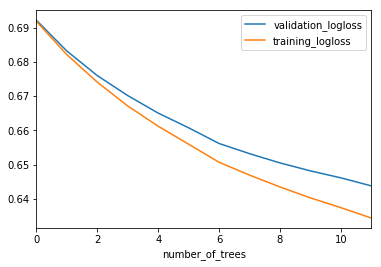

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

scoring_history = pd.DataFrame(gbm.score_history())

# plot the validation and training logloss
scoring_history.plot(x='number_of_trees', y = ['validation_logloss', 'training_logloss'])

<B>Step 3.1: Save/serialize the model and shutdown cluster</B>

In [24]:
#gbm.save_model_details()
path = h2o.save_model(gbm, path='../models/', force=True)
print(path)

/home/praveen/h2o/project/models/gbm_model


In [27]:
h2o.cluster().shutdown()

<B>Step 3.2: Re-initialize cluster and load model</B>

In [29]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,50 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_praveen_gnftll
H2O cluster total nodes:,1
H2O cluster free memory:,2.934 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [30]:
#supplied code (translated to python)
airlines_path = "../data/airlines.csv"
air_hex = h2o.import_file(data_path, destination_frame='air_hex')

cat_features = ['Year', 'Month', 'DayofMonth']

for x in cat_features:
    air_hex[x] = air_hex[x].asfactor()
    
features = cat_features + ['UniqueCarrier', 'Distance', 'Dest']
target = 'IsDepDelayed'
train, valid = air_hex.split_frame(ratios=[0.8], seed=12345)

Parse progress: |█████████████████████████████████████████████████████████| 100%


<B>Step 4: Load saved model</B>

In [31]:
gbm_model = h2o.load_model('../models/gbm_model')

In [32]:
import pandas as pd

# get the number of trees from scoring history for the model 
scoring_history = pd.DataFrame(gbm_model.score_history())

ntrees_gbm_model = int(scoring_history.tail(1)['number_of_trees'])

#model_summary = pd.DataFrame(gbm_model.summary())

In [33]:
ntrees_gbm_model

11

<B>Step 5: Continue training for another 100 trees without early stopping</B>

In [38]:
gbm_continued = H2OGradientBoostingEstimator(model_id = 'gbm_model_checkpoint',
                                             checkpoint = gbm_model,
                                             ntrees = ntrees_gbm_model + 100, #added to #tress in previous gbm model
                                             seed = 1234)
gbm_continued.train(x = features, y = target, training_frame = train, validation_frame = valid)



Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_model


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.22173329870174532
RMSE: 0.47088565353145484
LogLoss: 0.6344636324932591
Mean Per-Class Error: 0.3473687229456641
AUC: 0.7122254979800976
pr_auc: 0.7347590918523712
Gini: 0.4244509959601952
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4156796162158054: 


,NO,YES,Error,Rate
NO,4230.0,11423.0,0.7298,(11423.0/15653.0)
YES,1429.0,15928.0,0.0823,(1429.0/17357.0)
Total,5659.0,27351.0,0.3893,(12852.0/33010.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4156796,0.7125347,326.0
max f2,0.3502307,0.8483529,381.0
max f0point5,0.5360281,0.6719471,204.0
max accuracy,0.5219732,0.6530748,221.0
max precision,0.8249264,1.0,0.0
max recall,0.3224267,1.0,392.0
max specificity,0.8249264,1.0,0.0
max absolute_mcc,0.5360281,0.3057684,204.0
max min_per_class_accuracy,0.5256310,0.6500547,217.0
max mean_per_class_accuracy,0.5249005,0.6526313,218.0


Gains/Lift Table: Avg response rate: 52.58 %, avg score: 52.57 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0119358,0.7645667,1.8197679,1.8197679,0.9568528,0.7818972,0.9568528,0.7818972,0.0217203,0.0217203,81.9767855,81.9767855
,2,0.0211451,0.7602548,1.7141461,1.7737664,0.9013158,0.7617550,0.9326648,0.7731247,0.0157861,0.0375065,71.4146120,77.3766412
,3,0.0306271,0.7536438,1.7134666,1.7550979,0.9009585,0.7567734,0.9228487,0.7680624,0.0162470,0.0537535,71.3466554,75.5097910
,4,0.0400182,0.7369552,1.6318897,1.7261846,0.8580645,0.7466085,0.9076457,0.7630278,0.0153252,0.0690788,63.1889709,72.6184555
,5,0.0502878,0.7139618,1.7559636,1.7322659,0.9233038,0.7226190,0.9108434,0.7547756,0.0180331,0.0871118,75.5963564,73.2265931
,6,0.1,0.6691358,1.5796400,1.6563922,0.8305911,0.6888844,0.8709482,0.7220196,0.0785274,0.1656392,57.9640048,65.6392234
,7,0.1500454,0.6360326,1.4309747,1.5812075,0.7524213,0.6518224,0.8314153,0.6986064,0.0716138,0.2372530,43.0974671,58.1207535
,8,0.2006059,0.6078129,1.3149836,1.5141088,0.6914320,0.6194968,0.7961341,0.6786677,0.0664861,0.3037391,31.4983589,51.4108809
,9,0.3001212,0.5695622,1.2325687,1.4207547,0.6480974,0.5871043,0.7470475,0.6483068,0.1226594,0.4263986,23.2568738,42.0754702
,10,0.4001515,0.5446145,1.1334931,1.3489447,0.5960024,0.5570148,0.7092891,0.6254855,0.1133836,0.5397822,13.3493114,34.8944742




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.22611652421513992
RMSE: 0.47551711243144545
LogLoss: 0.6438436102778847
Mean Per-Class Error: 0.359856350957938
AUC: 0.6903139389777793
pr_auc: 0.6970170635494963
Gini: 0.3806278779555585
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4156805982950319: 


,NO,YES,Error,Rate
NO,1347.0,3887.0,0.7426,(3887.0/5234.0)
YES,487.0,5247.0,0.0849,(487.0/5734.0)
Total,1834.0,9134.0,0.3988,(4374.0/10968.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4156806,0.7058111,326.0
max f2,0.3290224,0.8456632,392.0
max f0point5,0.5326716,0.6567940,204.0
max accuracy,0.5284210,0.6394055,209.0
max precision,0.6986756,0.8514056,50.0
max recall,0.2903640,1.0,398.0
max specificity,0.8216580,0.9992358,0.0
max absolute_mcc,0.5326716,0.2803695,204.0
max min_per_class_accuracy,0.5269899,0.6367979,211.0
max mean_per_class_accuracy,0.5326716,0.6401436,204.0


Gains/Lift Table: Avg response rate: 52.28 %, avg score: 52.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0117615,0.7645667,1.5717588,1.5717588,0.8217054,0.7801759,0.8217054,0.7801759,0.0184862,0.0184862,57.1758827,57.1758827
,2,0.0213348,0.7602548,1.6395436,1.6021751,0.8571429,0.7615837,0.8376068,0.7718333,0.0156958,0.0341821,63.9543575,60.2175060
,3,0.0308169,0.7551119,1.6737007,1.6241830,0.875,0.7579185,0.8491124,0.7675518,0.0158702,0.0500523,67.3700732,62.4182959
,4,0.0400255,0.7397631,1.5150898,1.5990841,0.7920792,0.7487837,0.8359909,0.7632339,0.0139519,0.0640042,51.5089772,59.9084071
,5,0.0500547,0.7166273,1.6867426,1.6166477,0.8818182,0.7277976,0.8451730,0.7561337,0.0169166,0.0809208,68.6742556,61.6647702
,6,0.1008388,0.6710717,1.5041414,1.5599877,0.7863555,0.6913378,0.8155515,0.7235014,0.0763865,0.1573073,50.4141412,55.9987663
,7,0.1500729,0.6392007,1.3708406,1.4979346,0.7166667,0.6548525,0.7831106,0.7009799,0.0674922,0.2247994,37.0840600,49.7934556
,8,0.2002188,0.6094320,1.2659264,1.4398269,0.6618182,0.6230113,0.7527322,0.6814522,0.0634810,0.2882804,26.5926372,43.9826860
,9,0.3002371,0.5714634,1.2397460,1.3731738,0.6481313,0.5907455,0.7178864,0.6512350,0.1239972,0.4122776,23.9746030,37.3173756
,10,0.4004376,0.5462132,1.1800537,1.3248498,0.6169245,0.5589770,0.6926230,0.6281495,0.1182421,0.5305197,18.0053656,32.4849760



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-30 17:47:38,0.012 sec,0.0,0.4993334,0.6918142,0.5,0.0,1.0,0.4741896,0.4994893,0.6921260,0.5,0.0,1.0,0.4772064
,2019-04-30 17:47:38,0.158 sec,1.0,0.4944694,0.6821017,0.6758960,0.7067948,1.8267543,0.4371403,0.4950077,0.6831734,0.6669828,0.6782401,1.4939393,0.4448395
,2019-04-30 17:47:38,0.272 sec,2.0,0.4904467,0.6740838,0.6835982,0.7148068,1.8617276,0.3924568,0.4914100,0.6759995,0.6734906,0.6853408,1.5476298,0.3966083
,2019-04-30 17:47:38,0.357 sec,3.0,0.4869550,0.6671427,0.6926298,0.7198242,1.7270740,0.3964253,0.4884842,0.6701765,0.6775558,0.6844228,1.5467392,0.3962436
,2019-04-30 17:47:38,0.447 sec,4.0,0.4840045,0.6612361,0.6956017,0.7219733,1.8411884,0.3881551,0.4859325,0.6650671,0.6800408,0.6880765,1.4780734,0.4008023
,2019-04-30 17:47:39,0.540 sec,5.0,0.4814003,0.6560046,0.6988332,0.7221543,1.7707621,0.4131172,0.4837968,0.6607818,0.6821923,0.6870704,1.4719908,0.4010759
,2019-04-30 17:47:39,0.623 sec,6.0,0.4787808,0.6507272,0.7033018,0.7264771,1.7768492,0.3867313,0.4815208,0.6562050,0.6857525,0.6901422,1.4868735,0.4041758
,2019-04-30 17:47:39,0.734 sec,7.0,0.4769465,0.6469852,0.7040443,0.7266510,1.7713981,0.3807634,0.4800693,0.6532356,0.6854992,0.6908104,1.4973509,0.3945113
,2019-04-30 17:47:39,0.886 sec,8.0,0.4752635,0.6435297,0.7062823,0.7259784,1.7836768,0.3777643,0.4787516,0.6505400,0.6872561,0.6918922,1.4932187,0.3912290
,2019-04-30 17:47:39,1.018 sec,9.0,0.4737115,0.6403379,0.7082033,0.7297191,1.7981723,0.3768555,0.4776295,0.6482166,0.6877973,0.6940624,1.4654523,0.3934172


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
DayofMonth,1670.6702881,1.0,0.3456025
Dest,1647.2805176,0.9859998,0.3407640
UniqueCarrier,854.4280396,0.5114283,0.1767509
Distance,403.9977112,0.2418177,0.0835728
DayOfWeek,241.2422485,0.1443985,0.0499045
Month,16.4612503,0.0098531,0.0034052


gbm Model Build progress: |███████████████████████████████████████████████| 100%


<B>Step 6: Print validation logloss of model and plot scoring history </B>

In [39]:
print('Validation Logloss for GBM with Checkpointing:', gbm_continued.logloss(valid=True))

improvement_gbm = gbm.logloss(valid=True) - gbm_continued.logloss(valid=True)
print('Overall improvement in logloss is {0}'.format(improvement_gbm))

Validation Logloss for GBM with Checkpointing: 0.5908109009568151
Overall improvement in logloss is 0.05303270932106963


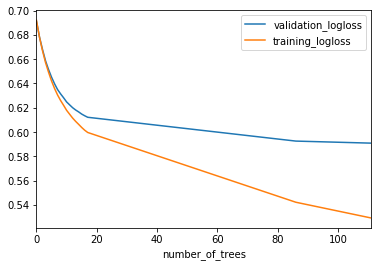

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

scoring_history = pd.DataFrame(gbm_continued.score_history())

# plot the validation and training logloss
scoring_history.plot(x='number_of_trees', y = ['validation_logloss', 'training_logloss'])

In [36]:
#h2o.cluster().shutdown()